In [1]:
import sys, os
import pandas as pd
import numpy as np
import subprocess
import gc
import optuna
from datetime import datetime, timezone
import warnings
import xgboost as xgb
import joblib as jl
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import matthews_corrcoef
from mlflow.models import infer_signature
import mlflow
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

today = datetime.now(timezone.utc).strftime("%Y_%m_%d")
warnings.filterwarnings("ignore")
# data
train_path = "../data/mushrooms/train.csv"
test_path = "../data/mushrooms/test.csv"
cache_path = "../data/mushrooms/cache"

In [2]:
train = pd.read_csv(train_path)
print(f"train size: {train.shape}")
test = pd.read_csv(test_path)
print(f"test size: {test.shape}")

target = "class"

train size: (3116945, 22)
test size: (2077964, 21)


In [3]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

<Axes: xlabel='count', ylabel='class'>

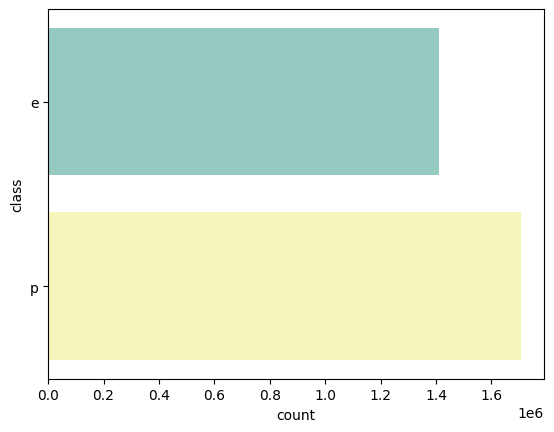

In [4]:
sns.countplot(train[target], palette="Set3")

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(train, minimal=True)
profile.to_file("train_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]